In [1]:
!wget --header="Host: dlib.net" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2" -O "shape_predictor_68_face_landmarks.dat.bz2" -c


--2019-06-02 03:59:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  13.2MB/s    in 7.9s    

2019-06-02 03:59:39 (7.73 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [0]:
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [3]:
!git clone https://github.com/Nilanshrajput/Face2facade.git

Cloning into 'Face2facade'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 23 (delta 4), reused 19 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.


int32


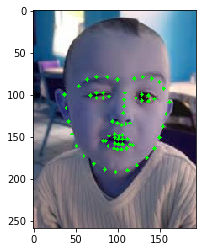

In [4]:
# import the necessary packages
from imutils import face_utils
import dlib
import cv2
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
from collections import OrderedDict 

 
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)

# load the input image and convert it to grayscale
image = cv2.imread("Face2facade/face_feature_Extractor/download2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 0)

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# show the output image with the face detections + facial landmarks

image=image.astype('int32')
print(image.dtype) 
plt.imshow( image)




In [0]:
from collections import OrderedDict

###---------------------------------------------------$####
###LEft and right of face not your perspecctive" ######
###---------------------------------------------------$####

FACIAL_LANDMARKS_IDXS = OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [0]:
###---------------------------------------------------$####
###LEft and right of face not your perspecctive" ######
###---------------------------------------------------$####

def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
# create two copies of the input image -- one for the
# overlay and one for the final output image
  overlay = image.copy()*0
  overlay[:]=[3,71,243]
  output = image.copy()*0+255
  
  # if the colors list is None, initialize it with a unique
  # color for each facial landmark region
  if colors is None:
    color=[(0,85,165),(120, 213, 241),(3,71,243)]
    #color=[(15,145,204),(117,223,236),(0,48,236)]
    
    # loop over the facial landmark regions individually
  for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
    # grab the (x, y)-coordinates associated with the
    # face landmark
    (j, k) = FACIAL_LANDMARKS_IDXS[name]
    pts = shape[j:k]

    # check if are supposed to draw the jawline
    if name == "jaw":
      # since the jawline is a non-enclosed facial region,
      # just draw lines between the (x, y)-coordinates
      for l in range(1, len(pts)):
        ptA = tuple(pts[l - 1])
        ptB = tuple(pts[l])
        #cv2.line(overlay, ptA, ptB, colors[i], 2)
      #print(1)
    # otherwise, compute the convex hull of the facial
    # landmark coordinates points and display it
    
    
    ###!            x1,y1
    #### 
    ####
    ####   x2,y2    
    
    else:
      #print((pts.shape))
      x_s,y_s=pts[:,0],pts[:,1]
      x1,x2,y1,y2=(max(x_s),min(x_s),min(y_s),max(y_s))
      p1=(max(x_s)+5,min(y_s)-10)
      p2=(min(x_s)-5,max(y_s)+10)
      clr=color[0]
      
        
      if name=="left_eyebrow":
        p1=(max(x_s)+55,min(y_s)-35)
        p2=(min(x_s)+35,max(y_s)-15)   
        clr=color[1]
        
        
      if name=="right_eyebrow":
        p1=(max(x_s)-40,min(y_s)-35)
        
        p2=(min(x_s)-75,max(y_s)-15)
        clr=color[1]
        
      if name=="left_eye":
        
        ###  y1+10,y2=(y2-y1)*5
        ###
        ###
        ###
        p1=(x1+55,y1+10)
        p2=(x2+35,y2+(y2-y1)*5+10) 
        
        
      if name=="right_eye":
        p1=(max(x_s)-40,y1+10)
        p2=(min(x_s)-75,y2+(y2-y1)*5+10)
        
      if name=="nose":
        clr=color[2]
      
      if name=="mouth":
        
        ###  y1+10,y2=(y2-y1)*5
        ###
        ###
        ###
        p1=(x1+10,y1+60)
        p2=(x2-10,y2+(y2-y1)*3+10) 
        
      
      overlay=cv2.rectangle(overlay,p1,p2,clr,cv2.FILLED)
      output=cv2.rectangle(image,p1,p2,clr,cv2.FILLED)
      hull = cv2.convexHull(pts)
      #print(1)
      #cv2.drawContours(overlay, [hull], -1, colors[i], -1)
      # apply the transparent overlay
  #cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)      


    # return the output image
  return output,overlay

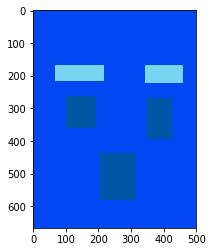

In [24]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
from collections import OrderedDict 

 
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
 
# load the input image, resize it, and convert it to grayscale
image = cv2.imread("Face2facade/face_feature_Extractor/download2.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the landmark (x, y)-coordinates to a NumPy array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

  # loop over the face parts individually
  for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = image.copy()
    cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
      0.7, (0, 0, 255), 2)

    # loop over the subset of facial landmarks, drawing the
    # specific face part
    for (x, y) in shape[i:j]:
      cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)

    # extract the ROI of the face region as a separate image
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = image[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)

    # show the particular face part
    #cv2.imshow("ROI", roi)
    #cv2.imshow("Image", clone)
    #cv2.waitKey(0)

  # visualize all facial landmarks with a transparent overlay
  output,over =visualize_facial_landmarks(image, shape)
  plt.imshow( over
            )
  
  

In [8]:
print(over.shape)

(667, 500, 3)


In [0]:
plt.imsave("bleh.jpg",over)

In [10]:
i=plt.imread("bleh.jpg")
print(i.shape)

(667, 500, 3)


In [0]:
from PIL import Image

import matplotlib
file_name = 'out2.jpg'
plt.imsave(file_name, over)

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(file_name)

In [12]:

!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 57kB/s 
     |████████████████████████████████| 419kB 46.5MB/s 
     |████████████████████████████████| 3.0MB 49.1MB/s 
     |████████████████████████████████| 61kB 31.6MB/s 


In [13]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

_URL = 'https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz'

path_to_zip = tf.keras.utils.get_file('facades.tar.gz',
                                      origin=_URL,
                                      extract=True)


PATH = os.path.join(os.path.dirname(path_to_zip), 'facades/')


30171136/30168306 [==============================] - 3s 0us/step


In [0]:






BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [0]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  #input_image = tf.cast(input_image, tf.float32)
  #real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

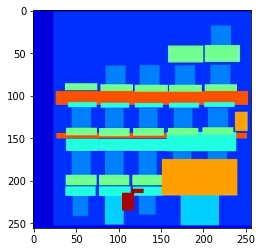

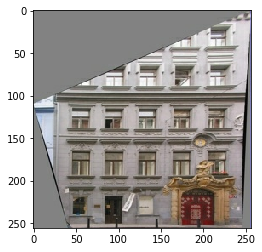

In [16]:
inp, re = load(PATH+'train/150.jpg')
print(np.unique(inp.numpy()))
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(tf.cast(inp, tf.float32)/255.0)
plt.figure()
plt.imshow(tf.cast(re, tf.float32)/255.0)

In [17]:
print(inp[53,243
         
         ])

tf.Tensor([  2  84 166], shape=(3,), dtype=uint8)


((3, 71, 243), (120, 213, 241))

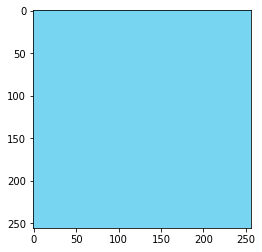

In [18]:
a=np.array(inp)*0
a[:]=[  120, 213, 241]
plt.imshow(a/255)
color=[(0,85,165),(3,71,243),(120, 213, 241)]
(3,71,243),(120,213,241)